In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import scipy.optimize as sco
import scipy.interpolate as sci




In [2]:
from scipy import signal
from scipy.fftpack import fft, fftshift
import matplotlib.pyplot as plt

[0.77483743 0.84936582 0.91225408 0.96000544 0.9898478  1.
 0.9898478  0.96000544 0.91225408 0.84936582 0.77483743]


Text(0.5, 0, 'Sample')

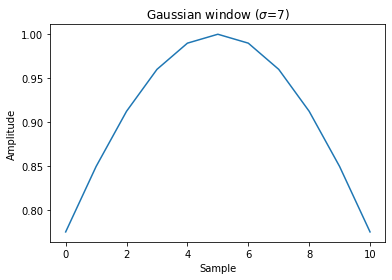

In [3]:
window = signal.gaussian(11, std=7)
print(window)
plt.plot(window)
plt.title(r"Gaussian window ($\sigma$=7)")
plt.ylabel("Amplitude")
plt.xlabel("Sample")

-0.2 0.4
0.1 0.3
0.2 0.4


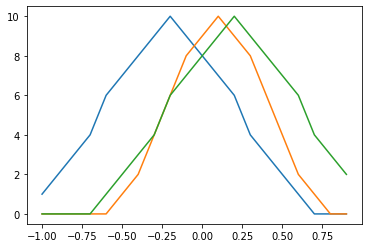

In [134]:
from matplotlib import pyplot as mp
import numpy as np
from functools import reduce

def gaussian(x, mu, sig):
    return (np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))*10).astype(int)

x_values = np.arange(-1,1,0.1)

Synthetic_Stocks = []

for mu, sig in [(-0.2, 0.40), (0.10, 0.3), (0.2, 0.40)]:
    
    print(mu, sig)
    
    mp.plot(x_values, gaussian(x_values, mu, sig))
    
    values = gaussian(x_values, mu, sig)


    Final_Stock = []

    for idx,x in enumerate(values):
        a = np.empty(x)
        a.fill(round(x_values[idx],3))
        
        Final_Stock.extend(list(a))

    
    Synthetic_Stocks.append(Final_Stock)



In [135]:
#Fill with zeros
maxL = max([len(Synthetic_Stocks[0]),len(Synthetic_Stocks[1]),len(Synthetic_Stocks[2])])
for i in range(0,3):
    print(sum(Synthetic_Stocks[i]))
    print(len(Synthetic_Stocks[i]))
    a = np.empty(maxL - len(Synthetic_Stocks[i]))
    a.fill(0)
    Synthetic_Stocks[i].extend(a)
    print('mean {}'.format(np.mean(Synthetic_Stocks[i])))

-17.999999999999996
90
mean -0.2
7.0
70
mean 0.07777777777777777
16.999999999999996
89
mean 0.18888888888888888


In [277]:
import datetime

start = datetime.datetime.strptime("01-01-2020", "%d-%m-%Y")
date_generated = [(start + datetime.timedelta(days=x)).strftime('%Y%m%d') for x in range(0, 90)]

for date in date_generated:
    print(date)



20200101
20200102
20200103
20200104
20200105
20200106
20200107
20200108
20200109
20200110
20200111
20200112
20200113
20200114
20200115
20200116
20200117
20200118
20200119
20200120
20200121
20200122
20200123
20200124
20200125
20200126
20200127
20200128
20200129
20200130
20200131
20200201
20200202
20200203
20200204
20200205
20200206
20200207
20200208
20200209
20200210
20200211
20200212
20200213
20200214
20200215
20200216
20200217
20200218
20200219
20200220
20200221
20200222
20200223
20200224
20200225
20200226
20200227
20200228
20200229
20200301
20200302
20200303
20200304
20200305
20200306
20200307
20200308
20200309
20200310
20200311
20200312
20200313
20200314
20200315
20200316
20200317
20200318
20200319
20200320
20200321
20200322
20200323
20200324
20200325
20200326
20200327
20200328
20200329
20200330


In [278]:


synthetic_df = pd.DataFrame(list(zip(Synthetic_Stocks[0], Synthetic_Stocks[1],Synthetic_Stocks[2] )),columns =['Stock1', 'Stock2','Stock3'])

dates_df = pd.DataFrame(list(zip(date_generated,date_generated,date_generated)),columns =['Stock1', 'Stock2','Stock3'])

dates_df_squezed = pd.DataFrame(dates_df.stack().squeeze()).reset_index().drop(columns=['level_0','level_1'])
dates_df_squezed.columns = ['datadate']

df1_close = pd.DataFrame(synthetic_df.stack().squeeze()).reset_index().drop(columns=['level_0'])


df1_final = pd.concat([df1_close,dates_df_squezed], axis=1)

df1_final 

,level_1,0,datadate
0,Stock1,-1.0,20200101
1,Stock2,-0.5,20200101
2,Stock3,-0.6,20200101
3,Stock1,-0.9,20200102
4,Stock2,-0.4,20200102
...,...,...,...
265,Stock2,0.0,20200329
266,Stock3,0.9,20200329
267,Stock1,0.6,20200330
268,Stock2,0.0,20200330


In [284]:

df1_final.columns =['tic', 'daily_return','datadate']

df1_final.loc[df1_final.tic == 'Stock1', 'tic'] = 'AAPL'
df1_final.loc[df1_final.tic == 'Stock2', 'tic'] = 'CL=F'
df1_final.loc[df1_final.tic == 'Stock3', 'tic'] = 'TSLA'

df1_final =df1_final[['datadate', 'daily_return','tic']]

In [285]:
synthetic_df = df1_final
synthetic_df[:201]

,datadate,daily_return,tic
0,20200101,-1.0,AAPL
1,20200101,-0.5,CL=F
2,20200101,-0.6,TSLA
3,20200102,-0.9,AAPL
4,20200102,-0.4,CL=F
...,...,...,...
196,20200306,0.5,CL=F
197,20200306,0.4,TSLA
198,20200307,-0.0,AAPL
199,20200307,0.5,CL=F


In [286]:
synthetic_df.to_csv('synthetic_portolio_ready.csv')

In [138]:
# Create a list of symbols
symbols = [
  "TSLA", "MSFT", "CL=F"
]
# Instantiate data frame container
asset_data = pd.DataFrame()
# For loop to get data from Yahoo finance
for sym in symbols:
  # Each run of the loop returns a pandas data frame
  asset_data[sym] = web.DataReader(
    name = sym, 
    data_source = 'yahoo',
    start = '2018-01-01'
    # Use [ to extract values as pandas series
    )['Adj Close']
# Set column indices
asset_data.columns = symbols
# Examine the first 5 rows
asset_data.head(n = 5)

,TSLA,MSFT,CL=F
Date,,,
2018-01-02,21.368668,80.940384,60.369999
2018-01-03,21.150000,81.317085,61.630001
2018-01-04,20.974667,82.032784,62.009998
2018-01-05,21.105333,83.049843,61.439999
2018-01-08,22.427334,83.134583,61.730000


In [108]:
asset_data = pd.read_csv("portfolio.csv")

In [109]:
# Create a list of symbols
symbols = [
  "TSLA", "MSFT", "CL=F"
]

In [110]:
# Compute daily simple returns
daily_returns = (
  asset_data.pct_change()
            .dropna(
              # Drop the first row since we have NaN's
              # The first date 2011-09-13 does not have a value since it is our cut-off date
              axis = 0,
              how = 'any',
              inplace = False
              )
)
# Examine the last 5 rows
daily_returns

,TSLA,MSFT,CL=F
1,0.100000,0.050000,0.000000
2,0.090909,0.047619,0.000000
3,0.083333,0.045455,1.000000
4,0.076923,0.043478,0.000000
5,0.071429,0.041667,0.000000
6,-0.066667,-0.040000,0.500000
7,-0.071429,-0.041667,0.000000
8,-0.076923,-0.043478,0.000000
9,-0.083333,-0.045455,0.333333
10,-0.090909,-0.047619,0.000000


In [139]:
daily_returns = synthetic_df
daily_returns

,Stock1,Stock2,Stock3
0,-1.0,-0.5,-0.6
1,-0.9,-0.4,-0.5
2,-0.9,-0.4,-0.5
3,-0.8,-0.3,-0.4
4,-0.8,-0.3,-0.4
...,...,...,...
85,0.4,0.0,0.8
86,0.4,0.0,0.8
87,0.5,0.0,0.9
88,0.5,0.0,0.9


In [230]:
daily_returns.mean()* 251

Stock1   -50.200000
Stock2    19.522222
Stock3    47.411111
dtype: float64

In [231]:
# Function for computing portfolio return
def portfolio_returns(weights):
    return (np.sum(daily_returns.mean() * weights)) * 251

In [232]:
# Function for computing standard deviation of portfolio returns
def portfolio_sd(weights):
    return np.sqrt(np.transpose(weights) @ (daily_returns.cov() * 251) @ weights)

In [233]:
# instantiate empty list containers for returns and sd
list_portfolio_returns = []
list_portfolio_sd = []
# For loop to simulate 5000 random weight vectors (numpy array objects)
for p in range(5000):
  # Return random floats in the half-open interval [0.0, 1.0)
    weights = np.random.random(size = len(symbols)) 
    # Normalize to unity
    # The /= operator divides the array by the sum of the array and rebinds "weights" to the new object
    weights /= np.sum(weights) 
    # Lists are mutable so growing will not be memory inefficient
    list_portfolio_returns.append(portfolio_returns(weights))
    list_portfolio_sd.append(portfolio_sd(weights))
    # Convert list to numpy arrays
    port_returns = np.array(object = list_portfolio_returns)
    port_sd = np.array(object = list_portfolio_sd)

In [144]:
# Max expected return
round(max(port_returns), 4)


45.1394

In [145]:
# Min expected return
round(min(port_returns), 4)

-46.8194

In [146]:
# Max sd
round(max(port_sd), 4)


5.6414

In [147]:
round(min(port_sd), 4)

3.7348

In [148]:
# User defined Sharpe ratio function
# Negative sign to compute the negative value of Sharpe ratio
def sharpe_fun(weights):
    return - (portfolio_returns(weights) / portfolio_sd(weights))

In [149]:
# We use an anonymous lambda function
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})

In [150]:
# This creates 12 tuples of (0, 1), all of which exist within a container tuple
# We essentially create a sequence of (min, max) pairs
bounds = tuple(
  (0, 1) for w in weights
)

In [151]:
bounds

((0, 1), (0, 1), (0, 1))

In [152]:
# Repeat the list with the value (1 / 12) 12 times, and convert list to array
equal_weights = np.array(
  [1 / len(symbols)] * len(symbols)
)
equal_weights

array([0.33333333, 0.33333333, 0.33333333])

In [153]:
# Minimization results
max_sharpe_results = sco.minimize(
  # Objective function
  fun = sharpe_fun, 
  # Initial guess, which is the equal weight array
  x0 = equal_weights, 
  method = 'SLSQP',
  bounds = bounds, 
  constraints = constraints
)
max_sharpe_results

     fun: -8.65041687661578
     jac: array([ 1.89156691e+01, -4.50611115e-04,  5.74588776e-05])
 message: 'Optimization terminated successfully'
    nfev: 24
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([8.98313521e-13, 1.13071099e-01, 8.86928901e-01])

In [166]:
# Extract the weight composition array
for i in range(0,3):
    w = round(max_sharpe_results["x"][i],2)
    print(w)

0.0
0.11
0.89


In [155]:
# Expected return
max_sharpe_port_return = portfolio_returns(max_sharpe_results["x"])
round(max_sharpe_port_return, 4)

44.6103

In [156]:
# Standard deviation
max_sharpe_port_sd = portfolio_sd(max_sharpe_results["x"])
round(max_sharpe_port_sd, 4)



5.157

In [157]:
# Sharpe ratio
max_sharpe_port_sharpe = max_sharpe_port_return / max_sharpe_port_sd
round(max_sharpe_port_sharpe, 4)

8.6504

In [158]:
# Minimize sd
min_sd_results = sco.minimize(
  # Objective function
  fun = portfolio_sd, 
  # Initial guess, which is the equal weight array
  x0 = equal_weights, 
  method = 'SLSQP',
  bounds = bounds, 
  constraints = constraints
)

In [159]:
# Expected return
min_sd_port_return = portfolio_returns(min_sd_results["x"])
round(min_sd_port_return, 4)

14.2449

In [160]:
# Standard deviation
min_sd_port_sd = portfolio_sd(min_sd_results["x"])
round(min_sd_port_sd, 4)

3.7347

In [161]:
# Sharpe ratio
min_sd_port_sharpe = min_sd_port_return / min_sd_port_sd
round(min_sd_port_sharpe, 4)

3.8142

In [ ]:
import pandas as pd 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
import pandas_datareader.data as web
import datetime

start = datetime.datetime(2018,1,1)
end = datetime.datetime(2022,11,19)

In [ ]:
def get_stock(ticker):
    data = web.DataReader(f"{ticker}","yahoo",start,end)
    data[f'{ticker}'] = data["Close"]
    data = data[[f'{ticker}']] 
    print(data.head())
    return data 

In [ ]:
pfizer = get_stock("PFE")
jnj = get_stock("JNJ")

In [ ]:
portfolio = asset_data
portfolio.to_csv("portfolio.csv", index=False)

In [ ]:
portfolio = pd.read_csv("portfolio.csv")



In [ ]:
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage


mu = mean_historical_return(portfolio)
S = CovarianceShrinkage(portfolio).ledoit_wolf()

In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier

ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()

cleaned_weights = ef.clean_weights()
print(dict(cleaned_weights))

In [ ]:
ef.portfolio_performance(verbose=True)

In [ ]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(portfolio)

da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=1000)

allocation, leftover = da.greedy_portfolio()
print("Discrete allocation:", allocation)
print("Funds remaining: ${:.2f}".format(leftover))